# Examen de Diabetes en mujeres de ascendencia indígena - Elida Peña

# Instrucciones para examen
**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset** 

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

**1. Pregnancies:** Número de embarazos.

**2. Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.

**3. BloodPressure:** Presión arterial diastólica (mm Hg).

**4. SkinThickness:** Espesor del pliegue cutáneo del tríceps (mm).

**5. Insulin:** Niveles séricos de insulina a las 2 horas (mu U/ml).

**6. BMI:** Índice de masa corporal (peso en kg / (altura en m)^2).

**7. DiabetesPedigreeFunction:** Función de pedigrí de diabetes.

**8. Age:** Edad (años).

**9. Outcome:** Variable objetivo (1: diabetes, 0: no diabetes).

**Requisitos**

**1.Limpieza de Datos:**

* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

* **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

* **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [30]:
# Importacion de librerias para este examen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    roc_curve
)

In [ ]:
# Ejemplo utilizado de la clase del 08/10/2021 https://drive.google.com/drive/folders/1fTyqpWdRh9rIKQCVYlc2eF2HGr8ttHaw
# Definir ruta del dataset de diabetes
path = '../data/diabetes.csv'
# Cargar las informaciones en un data_frame
data_frame = pd.read_csv(path, sep=',', header=0)
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [ ]:
#  Utilice este ejemplo https://www.youtube.com/watch?v=5EYfUxzCCJI&t=82s
# Identificar duplicados
duplicados = data_frame.duplicated()
print(f"Cantidad de filas duplicadas: {duplicados.sum()}")
# Eliminar duplicados si los hay
if duplicados.sum() > 0:
    data_frame = data_frame.drop_duplicates()
    print("Duplicados eliminados.")

# Verificar nuevamente si quedan duplicados
print(f"Cantidad de filas duplicadas tras limpieza: {data_frame.duplicated().sum()}")

# Mostrar la forma del dataset tras la limpieza
print(f"Dimensiones del dataset tras limpieza: {data_frame.shape}")

Cantidad de filas duplicadas: 0
Cantidad de filas duplicadas tras limpieza: 0
Dimensiones del dataset tras limpieza: (768, 9)


* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [ ]:
# Ejemplo utilizado de https://codingdojolatam.la/cursos/data-science-fundamentals-mitic-a-septiembre-2024/leccion/pandas-para-ciencia-de-datos-introduccion-a-pandas-4/
# Verificar los tipos de datos actuales
print("Tipos de datos actuales:")
print(data_frame.dtypes)

Tipos de datos actuales:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [37]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Convertir la columna Outcome a categórica
data_frame["Outcome"] = data_frame["Outcome"].astype("category")

# Verifica nuevamente los tipos de datos después del ajuste
print("\nTipos de datos después del ajuste:")
print(data_frame.dtypes)



Tipos de datos después del ajuste:
Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object


**Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [ ]:
# Ejemplo de guia que se encuentra en mitic-data-science-team-1-septiembre-2024/clases/ds-fundamentals/pruebas-resueltas
# Listar las columnas categóricas
categorical_columns = data_frame.select_dtypes(include=["category", "object"]).columns
print("Columnas categóricas:", categorical_columns)
# Inspeccionar valores únicos en columnas categóricas
for col in categorical_columns:
    print(f"\nValores únicos en '{col}':")
    print(data_frame[col].unique())


# Verificar si todas las categorías son consistentes
all_consistent = True

for col in categorical_columns:
    unique_values = data_frame[col].unique()
    #  Utiliza set() para detectar duplicados en los valores únicos de cada columna.
    if len(unique_values) != len(set(unique_values)):
        all_consistent = False
        print(f"\nInconsistencias detectadas en '{col}'. Valores únicos: {unique_values}")

if all_consistent:
    print("\nNo se encontraron inconsistencias en los valores categóricos.")



Columnas categóricas: Index(['Outcome'], dtype='object')

Valores únicos en 'Outcome':
[1, 0]
Categories (2, int64): [0, 1]

No se encontraron inconsistencias en los valores categóricos.


**Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [ ]:
# Ejercicio de guia "valores_nulos" de la clase semana 3, que se encuentra en el repositorio MITIC-DATA-SCIENCE-TEAM1-SEPTIEMBRE-2024
#  Identificar valores faltantes
print("Valores faltantes por columna:")
# verificar los valores faltantes con insull, usar el sum para identificar cuantos nulos hay en cada columna
missing_values = data_frame.isnull().sum()
print(missing_values)

# Verificar si hay valores faltantes
if missing_values.sum() == 0:
    print("No hay valores faltantes")
else:
    print("Si hay valores faltantes")

Valores faltantes por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
No hay valores faltantes


**2. Exploración de Datos:**

**Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables

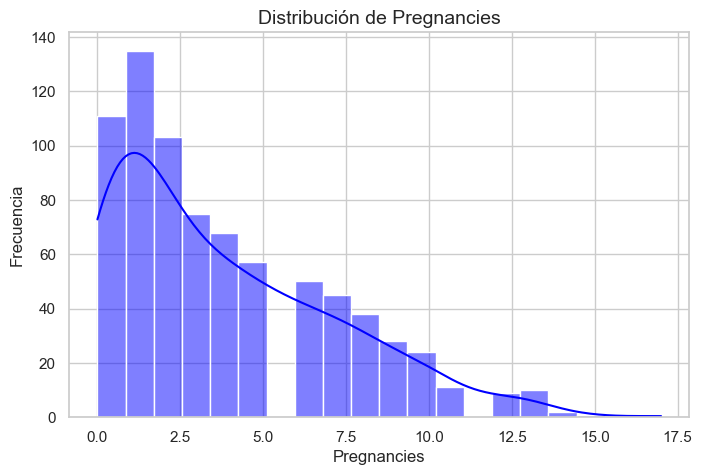

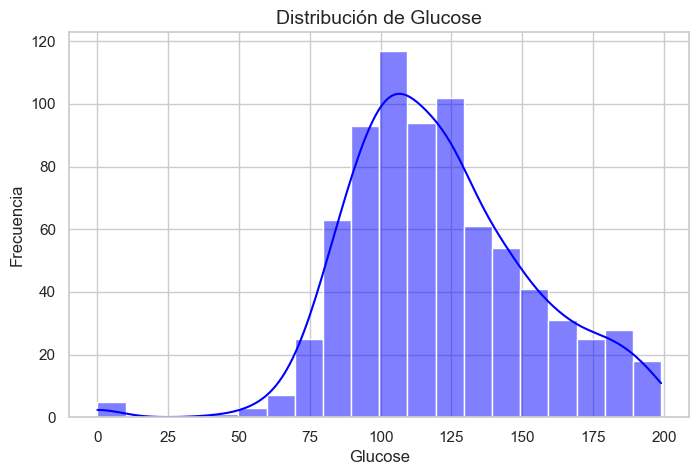

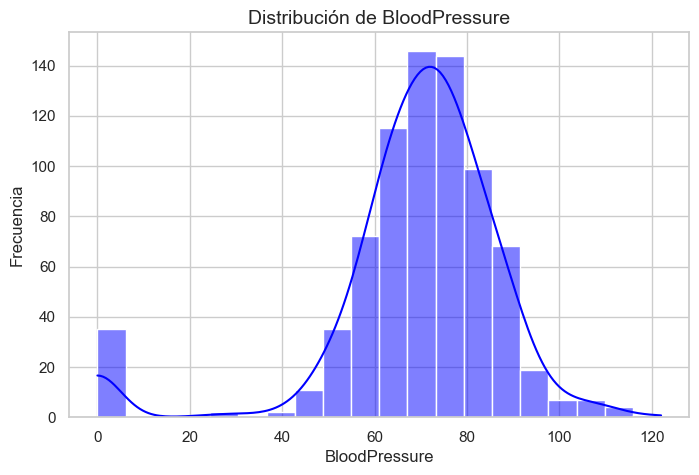

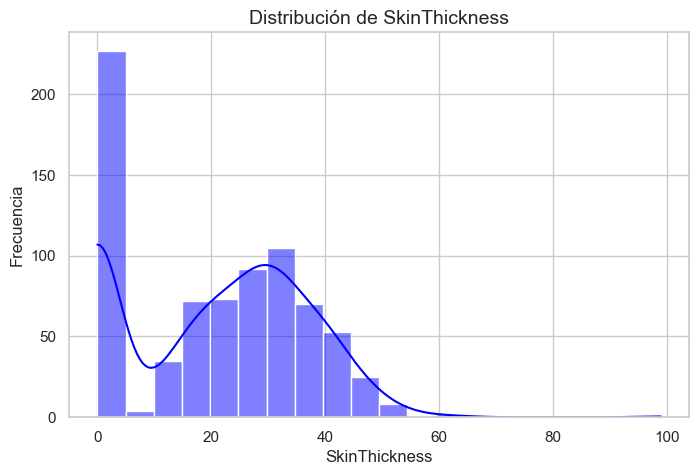

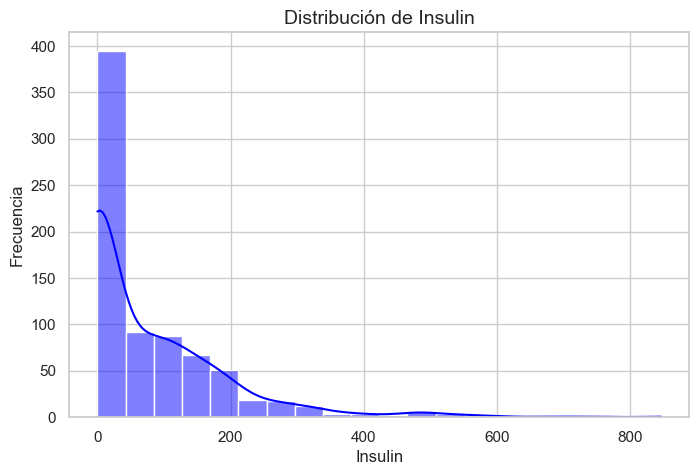

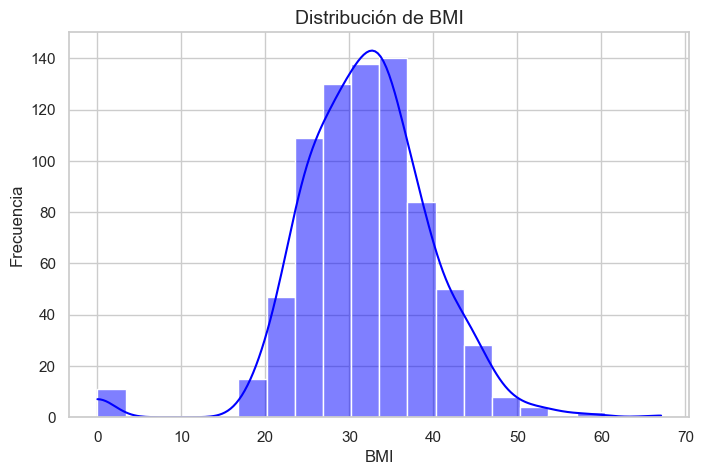

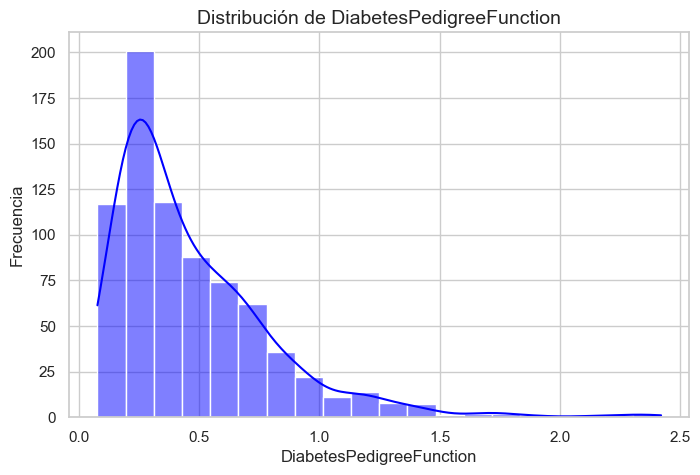

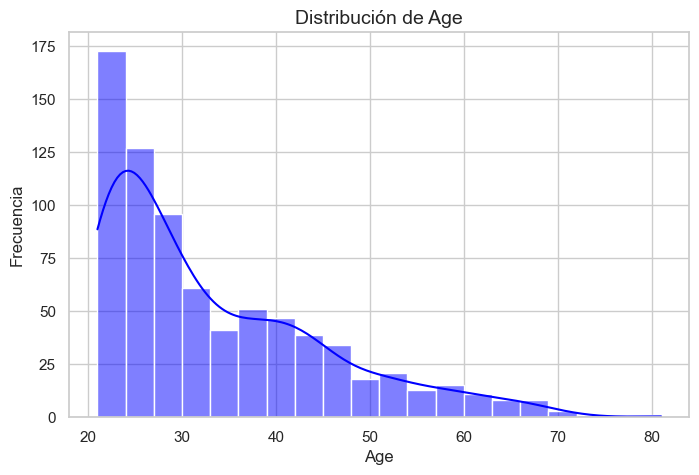

C:\Users\59598\AppData\Local\Temp\ipykernel_19888\681800007.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_frame, palette='muted')


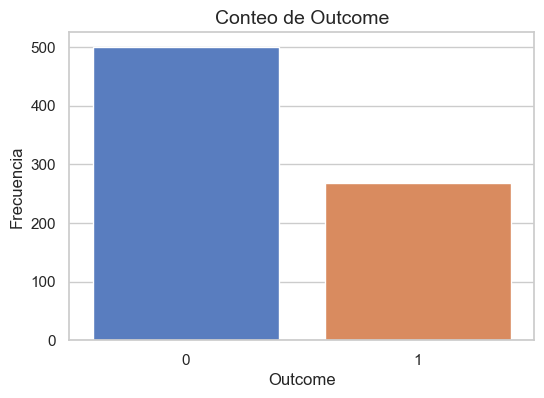

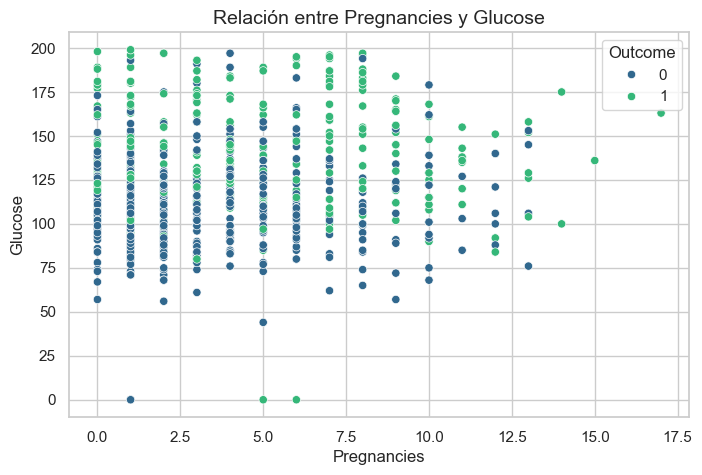

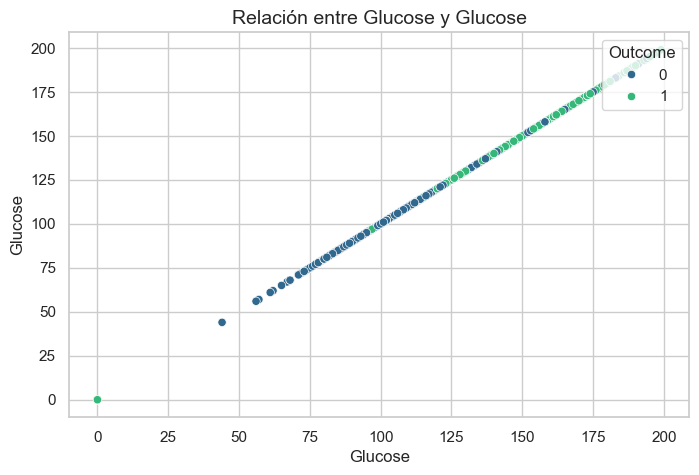

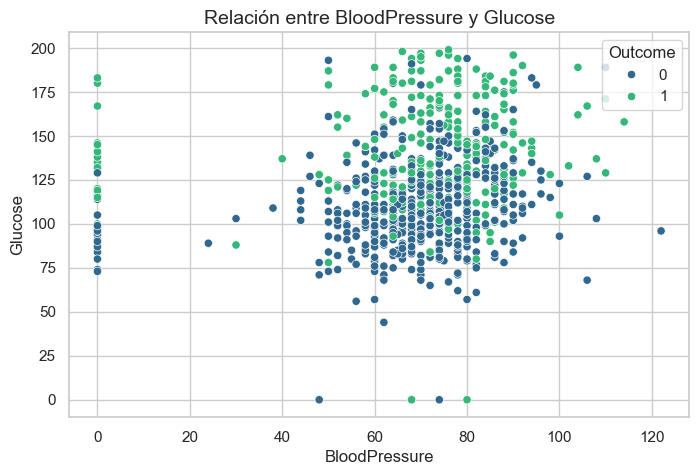

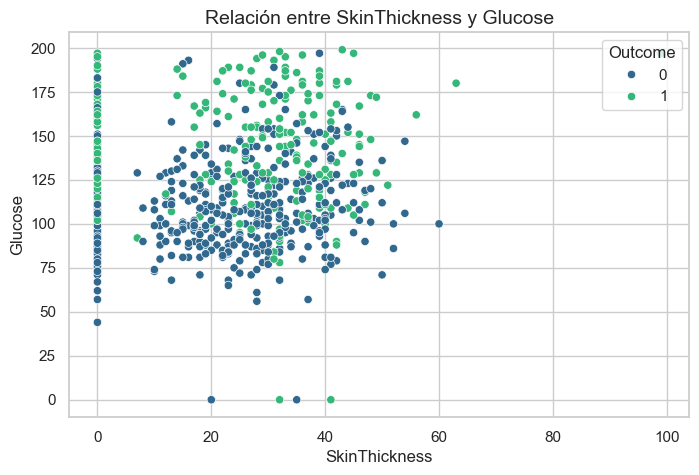

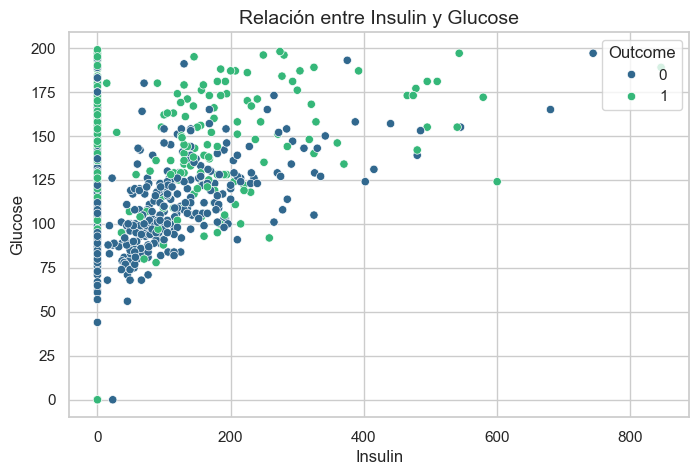

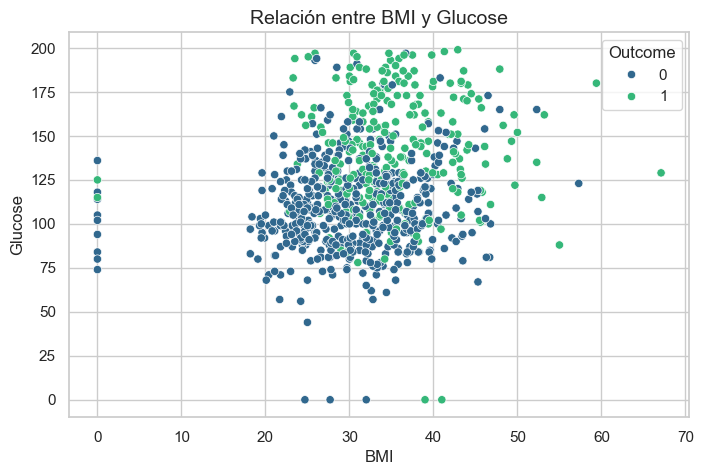

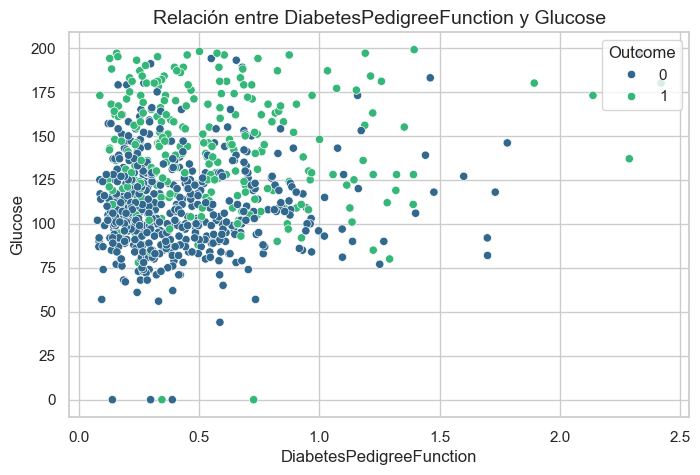

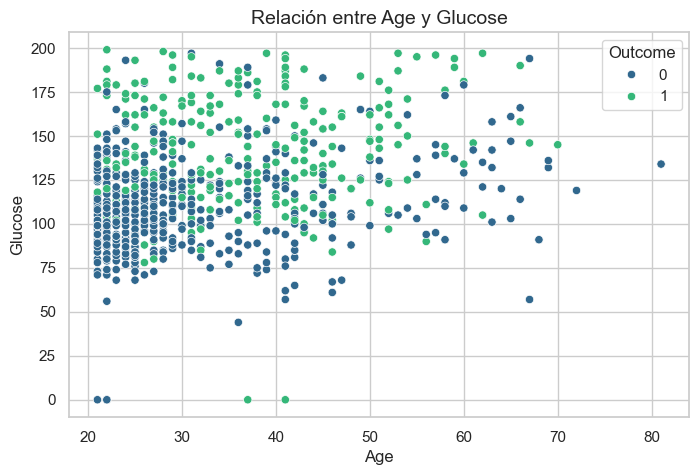

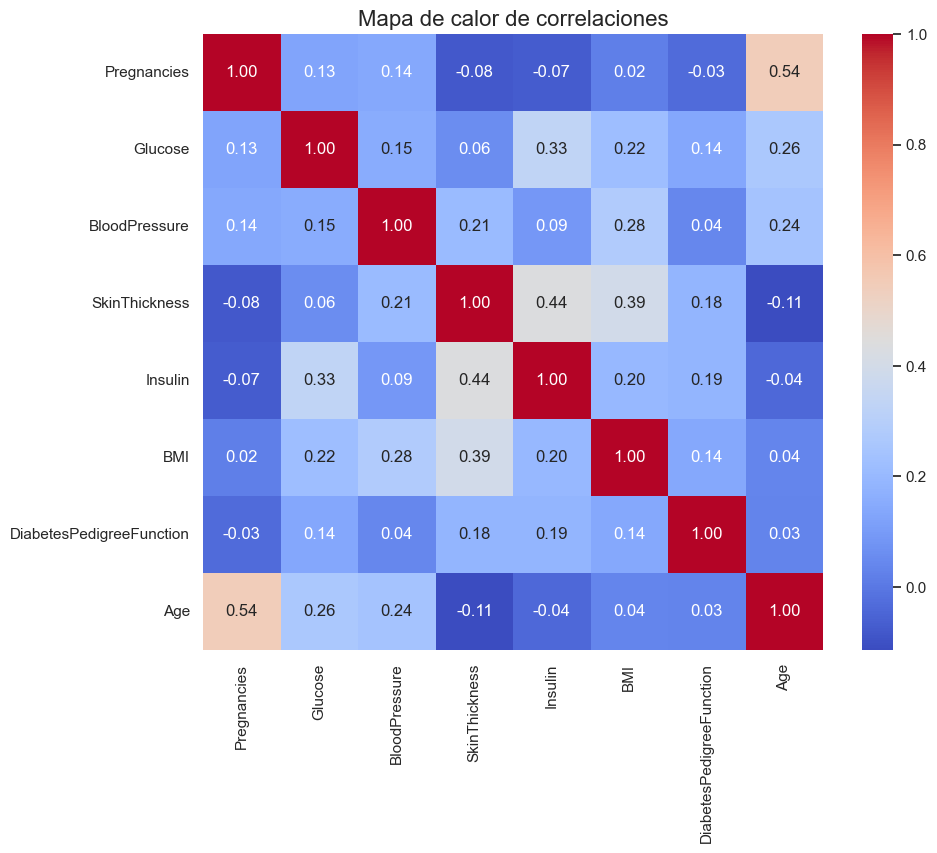

In [ ]:
# Ejemplo utlizado de mitic-data-science-team-1-septiembre-2024/machine-learning/clases/knn_regresor.ipynb
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Visualización univariada: Histogramas para columnas numéricas
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_frame[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.show()
    # Descripción del histograma
    plt.show()

# Visualización univariada: Gráfico de barras para columnas categóricas
categorical_columns = ['Outcome']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data_frame, palette='muted')
    plt.title(f'Conteo de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.show()

# Visualización multivariada: Gráficos de dispersión para variables numéricas con la variable objetivo
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data_frame[col], y=data_frame['Glucose'], hue=data_frame['Outcome'], palette='viridis')
    plt.title(f'Relación entre {col} y Glucose', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Glucose', fontsize=12)
    plt.legend(title='Outcome', loc='upper right')
    plt.show()

# Visualización multivariada: Mapa de calor para la correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = data_frame[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de calor de correlaciones', fontsize=16)
plt.show()


**Descripciones para los gráficos:**

**1. Histograma de Distribuciones Univariadas:**

* **Pregnancies:** La mayoría de las mujeres tienen menos de 5 embarazos, con una disminución gradual a medida que aumentan los valores.

* **Glucose:** Muestra una distribución aproximadamente normal, con un pico entre 100 y 125.

* **BloodPressure:** Los valores se concentran alrededor de 70-80 mm Hg, con pocos valores extremos.

* **SkinThickness:** Los valores predominan entre 20-40 mm, pero hay una alta frecuencia de ceros, posiblemente representando datos faltantes.

* **Insulin:** Los valores están mayormente concentrados hacia el extremo inferior (cerca de 0), con algunos valores muy altos.

* **BMI:** La mayoría de los valores están entre 25 y 40, indicando un rango de índice de masa corporal elevado.

* **DiabetesPedigreeFunction:** Los valores se agrupan principalmente entre 0.2 y 0.6, con pocos valores altos.

* **Age:** Predominan pacientes de entre 20 y 40 años, mientras que las personas mayores de 60 son menos frecuentes.

**2. Gráfico de Barras - Conteo de Outcome:**

* Este gráfico muestra la proporción de pacientes sin diabetes (Outcome = 0) frente a aquellos con diabetes (Outcome = 1). La cantidad de pacientes sin diabetes es significativamente mayor que la cantidad de pacientes con diabetes.

**3. Diagramas de Dispersión - Relación entre variables:**

* Los diagramas de dispersión ilustran la relación entre variables independientes y los niveles de glucosa (Glucose), diferenciando por el estado de diabetes (Outcome).
* Por ejemplo:
    * Glucose vs Pregnancies: A medida que aumentan los embarazos, también aumentan los niveles de glucosa en pacientes con diabetes (Outcome = 1).

    * BMI vs Glucose: Existe una tendencia a que un BMI más alto esté relacionado con niveles más altos de glucosa.

    * SkinThickness vs Glucose: Se observa una relación moderada, aunque los valores cercanos a cero afectan la interpretación.

**4. Mapa de Calor de Correlaciones:**

* El mapa de calor muestra correlaciones lineales entre las variables numéricas. Algunas observaciones clave incluyen:

    * **'Age' y 'Pregnancies':** Fuerte correlación positiva, lo que sugiere que a mayor edad, es probable que haya más embarazos.

    * **'BMI' y 'Glucose':** Correlación moderada, lo que puede indicar que ambos factores están relacionados con la diabetes.
    
    * **Variables con baja correlación:** Algunas variables, como SkinThickness y DiabetesPedigreeFunction, tienen correlaciones bajas con otras, lo que podría indicar menor importancia en la predicción.

**Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [ ]:
# Ejemplo utilizado de la clae mitic-data-science-team-1-septiembre-2024/mitic-data-science-team-1-septiembre-2024/machine-learning/clases/knn_regresor.ipynb
#  Medidas de tendencia central y dispersión
print("Estadísticas descriptivas:\n")

# Cálculo de estadísticas para cada columna numérica
for col in numerical_columns:  # Reutilizamos la lista de columnas numéricas definida antes
    print(f"Columna: {col}")
    print(f"- Media: {data_frame[col].mean():.2f}")
    print(f"- Mediana: {data_frame[col].median():.2f}")
    print(f"- Moda: {data_frame[col].mode()[0]:.2f}")
    print(f"- Rango: {data_frame[col].max() - data_frame[col].min():.2f}")
    print(f"- Desviación estándar: {data_frame[col].std():.2f}")
    print("-" * 40)

Estadísticas descriptivas:

Columna: Pregnancies
- Media: 3.85
- Mediana: 3.00
- Moda: 1.00
- Rango: 17.00
- Desviación estándar: 3.37
----------------------------------------
Columna: Glucose
- Media: 120.89
- Mediana: 117.00
- Moda: 99.00
- Rango: 199.00
- Desviación estándar: 31.97
----------------------------------------
Columna: BloodPressure
- Media: 69.11
- Mediana: 72.00
- Moda: 70.00
- Rango: 122.00
- Desviación estándar: 19.36
----------------------------------------
Columna: SkinThickness
- Media: 20.54
- Mediana: 23.00
- Moda: 0.00
- Rango: 99.00
- Desviación estándar: 15.95
----------------------------------------
Columna: Insulin
- Media: 79.80
- Mediana: 30.50
- Moda: 0.00
- Rango: 846.00
- Desviación estándar: 115.24
----------------------------------------
Columna: BMI
- Media: 31.99
- Mediana: 32.00
- Moda: 32.00
- Rango: 67.10
- Desviación estándar: 7.88
----------------------------------------
Columna: DiabetesPedigreeFunction
- Media: 0.47
- Mediana: 0.37
- Moda: 0

**Implementación de Modelos:**

**Modelos de Clasificación:** Implementa modelos de Random Forest y XGBoost.

In [ ]:
# Ejemplo utilizado de la clase mitic-data-science-team-1-septiembre-2024/machine-learning/clases/random_forest.ipynb
# 1. Preparar datos
X = data_frame.drop(columns=["Outcome"])  # Variables independientes
y = data_frame["Outcome"]  # Variable dependiente

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entrenar modelo Random Forest
print("\nModelo Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Crear el modelo
rf_model.fit(X_train, y_train)  # Entrenar el modelo
y_pred_rf = rf_model.predict(X_test)  # Predecir en el conjunto de prueba

# Evaluar modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy del modelo Random Forest: {accuracy_rf:.2f}")
print("Reporte de clasificación Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 3. Entrenar modelo XGBoost
print("\nModelo XGBoost:")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)  # Crear el modelo
xgb_model.fit(X_train, y_train)  # Entrenar el modelo
y_pred_xgb = xgb_model.predict(X_test)  # Predecir en el conjunto de prueba

# Evaluar modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy del modelo XGBoost: {accuracy_xgb:.2f}")
print("Reporte de clasificación XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# 4. Comparación de resultados
print("\nComparación de modelos:")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")


Modelo Random Forest:
Accuracy del modelo Random Forest: 0.75
Reporte de clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231


Modelo XGBoost:
Accuracy del modelo XGBoost: 0.73
Reporte de clasificación XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.73      0.73       231


Comparación de modelos:
Random Forest Accuracy: 0.75
XGBoost Accuracy: 0.73


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\xgboost\core.py:158: UserWarning: [14:15:12] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Interpretación de Resultados:**

**1. Random Forest:**
* **Accuracy:** 0.75 (75%)
* **Reporte de Clasificación:**
    *Para la clase 0 (No Diabetes), tiene un buen desempeño con:
        * **Precision:** 0.82 (82%)
        * **Recall:** 0.80 (80%)
        * **F1-score:** 0.81
    * Para la clase 1 (Diabetes), su desempeño es menor:
        * **Precision:** 0.64
        * **Recall:** 0.66
        * **F1-score:** 0.65
** Conclusión:** El modelo tiene un buen desempeño en predecir los casos negativos (clase 0), pero presenta dificultades en predecir casos positivos (clase 1).
* **2. XGBoost:**
* **Accuracy:** 0.73 (73%)
* Reporte de Clasificación:
    * **Para la clase 0:**
        * **Precision:** 0.81
        * **Recall:** 0.77
        * **F1-score:** 0.79
    * **Para la clase 1:**
        * **Precision:** 0.60
        * **Recall:** 0.65
        * **F1-score:** 0.62
* **Conclusión:** El modelo tiene un desempeño algo menor que Random Forest, especialmente para la clase 1.

**2. XGBoost:**
* **Accuracy:** 0.73 (73%)
* **Reporte de Clasificación:**
    * Para la clase 0:
        * **Precision:** 0.81
        * **Recall:** 0.77
        * **F1-score:** 0.79
    * Para la clase 1:
        * **Precision:** 0.60
        * **Recall:** 0.65
        * **F1-score:** 0.62
* **Conclusión:** El modelo tiene un desempeño algo menor que Random Forest, especialmente para la clase 1.

**3. Comparación General:**
* **Random Forest Accuracy:** 75%
* **XGBoost Accuracy:** 73%
* Aunque ambos modelos tienen resultados similares, Random Forest supera a XGBoost en esta configuración específica.

* **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
La evaluación de los modelos se realizará utilizando métricas comunes como:

**Accuracy:** Proporción de predicciones correctas.

**Precision:** Cuántos de los positivos predichos son realmente positivos.

**Recall:** Cuántos de los positivos reales son detectados.

**F1-Score:** Media armónica de Precision y Recall.

**ROC-AUC:** Capacidad del modelo para diferenciar entre clases.



Evaluación del Modelo Random Forest:
Accuracy: 0.75
Precision: 0.64
Recall: 0.66
F1-Score: 0.65
ROC-AUC: 0.81

Evaluación del Modelo XGBoost:
Accuracy: 0.73
Precision: 0.60
Recall: 0.65
F1-Score: 0.62
ROC-AUC: 0.78

Curvas ROC de los Modelos:


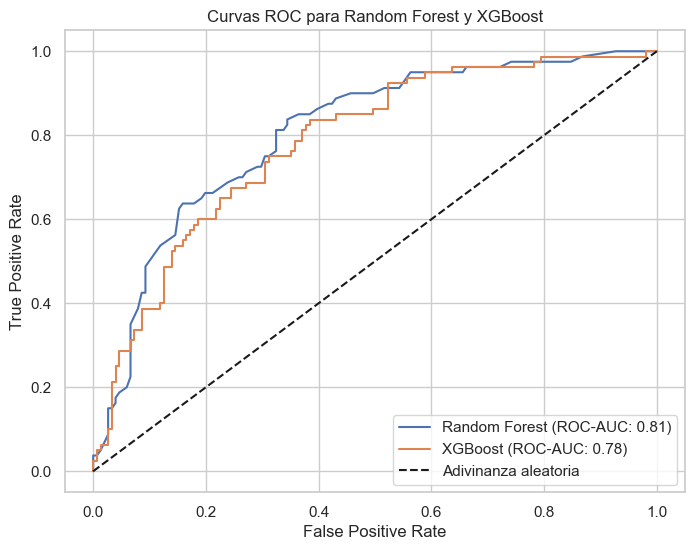

In [ ]:
# Ejemplo utlizado de la clase mitic-data-science-team-1-septiembre-2024/machine-learning/clases/random_forest.ipynb
# Evaluación del Modelo Random Forest
print("\nEvaluación del Modelo Random Forest:")
y_pred_rf = rf_model.predict(X_test)  # Predicciones de clase
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para calcular ROC-AUC

# Calcular métricas para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Imprimir resultados
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")

# Evaluación del Modelo XGBoost
print("\nEvaluación del Modelo XGBoost:")
y_pred_xgb = xgb_model.predict(X_test)  # Predicciones de clase
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades para calcular ROC-AUC

# Calcular métricas para XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Imprimir resultados
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")
print(f"ROC-AUC: {roc_auc_xgb:.2f}")

# Comparar las curvas ROC de ambos modelos
print("\nCurvas ROC de los Modelos:")
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (ROC-AUC: {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (ROC-AUC: {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Adivinanza aleatoria")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC para Random Forest y XGBoost")
plt.legend(loc="lower right")
plt.show()

**Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [ ]:
# Comparación de métricas clave con los resultados obtuvidos
comparison = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Random Forest": [0.75, 0.64, 0.66, 0.65, 0.81],
    "XGBoost": [0.73, 0.60, 0.65, 0.62, 0.78]
}

# Crear un DataFrame para la comparación
comparison_df = pd.DataFrame(comparison)

# Mostrar comparación
print("Comparación de Resultados:")
print(comparison_df)
print("La comparación de métricas clave muestra que el modelo Random Forest es el más adecuado para este dataset")


Comparación de Resultados:
      Metric  Random Forest  XGBoost
0   Accuracy           0.75     0.73
1  Precision           0.64     0.60
2     Recall           0.66     0.65
3   F1-Score           0.65     0.62
4    ROC-AUC           0.81     0.78
La comparación de métricas clave muestra que el modelo Random Forest es el más adecuado para este dataset


**Conclusión:**
En resumen, **Random Forest** es el modelo más adecuado porque:

* Tiene un mejor rendimiento general en todas las métricas clave (accuracy, precision, F1-Score, ROC-AUC).

* Es más robusto frente al sobreajuste, lo cual es valioso en datasets como este con variables diversas.

* Su balance entre precisión y recall lo hace confiable para aplicaciones prácticas donde tanto los falsos positivos como los falsos negativos son importantes.